In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

In [2]:
import glob

# "/checkpoint/yuandong/outputs/2019-08-08_12-16-38"

roots = ["/checkpoint/yuandong/outputs/2019-08-08_21-35-42", "/checkpoint/yuandong/outputs/2019-08-08_21-30-30"]

data = []

def convert_to_cpu(stats):
    if isinstance(stats, list):
        return [ convert_to_cpu(s) for s in stats ]
    elif isinstance(stats, dict):
        return { k : convert_to_cpu(v) for k, v in stats.items() }
    elif isinstance(stats, torch.Tensor):
        return stats.cpu()
    else:
        return stats
    
for root in roots:
    for sub_folder in glob.glob(os.path.join(root, "*")):
        print(sub_folder)
        path = os.path.join(root, sub_folder)
        args = yaml.load(open(os.path.join(path, "config.yaml"), "r"))
        stats = torch.load(os.path.join(path, "stats.pickle"))
        stats = convert_to_cpu(stats)
        data.append(dict(args=args,stats=stats))


/checkpoint/yuandong/outputs/2019-08-08_21-35-42/7_16597431
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/34_16597432
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/11_16597433
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/18_16597434
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/35_16597420
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/38_16597424
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/33_16597435
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/1_16597444
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/13_16597451
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/23_16597443
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/20_16597428
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/10_16597419
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/19_16597453
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/4_16597455
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/27_16597450
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/40_16597452
/checkpoint/yuandong/output

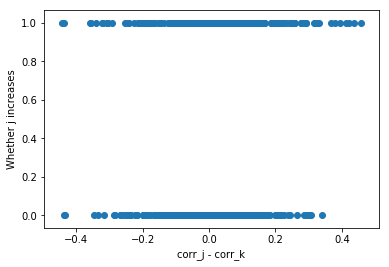

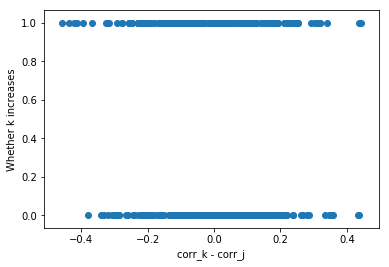

In [45]:
seed = 2
it = 1

d = data[27]["stats"][seed]

corr_train = d[it]["corr_train"]
corr_train_next = d[it + 1]["corr_train"]

j = 0
k = 1

# sel = 

student_corr_diff = corr_train[j,:] - corr_train[k,:]

student_j_inc = corr_train_next[j, :] > corr_train[j, :] + 0.01 
student_k_inc = corr_train_next[k, :] > corr_train[k, :] + 0.01

plt.scatter(student_corr_diff.numpy(), student_j_inc.float().numpy())
plt.xlabel("corr_j - corr_k")
plt.ylabel("Whether j increases")
plt.show()

plt.scatter(-student_corr_diff.numpy(), student_k_inc.float().numpy())
plt.xlabel("corr_k - corr_j")
plt.ylabel("Whether k increases")
plt.show()

In [256]:
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_09-42-11"
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_09-49-01"
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_19-02-07"

# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_20-01-07"

# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_20-24-47"

# Smaller initialization
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_20-31-37"

# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_20-37-16"

path = "/private/home/yuandong/dl_theory2/outputs/2019-08-20_20-41-44"

# Smaller initialization, no normalization.
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_16-46-11"

# smaller initialization, normalization. 
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_16-49-08"

# smaller initialization, feature fixed (linear regression)
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_16-52-40"

# no bias
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_18-07-34"

# adversarial init
# two_layer_new2.py seed=2587 multi=5 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000 adv_init=true
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_19-44-57"

# non adversarial init
# two_layer_new2.py seed=2587 multi=5 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000 adv_init=false
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_19-49-09"

# python two_layer_new2.py seed=2587 multi=10 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_19-55-15"
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-00-23"

# python two_layer_new2.py seed=25 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-07-31"

# python two_layer_new2.py seed=25 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.01 N=1000 num_iter=100000
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-11-47"

# python two_layer_new2.py seed=25 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-16-26"
# python two_layer_new2.py seed=25 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=200000
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-18-43"

# two_layer_new2.py seed=25 multi=2 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-24-06"

# two_layer_new2.py seed=25 multi=2 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000 adv_init=true
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-27-31"

# two_layer_new2.py seed=25 multi=2 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000 adv_init2=true
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-33-16"

# two_layer_new2.py seed=213 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000 adv_init2=true
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-36-24"

# two_layer_new2.py seed=213 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000 adv_init=true
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-38-50"

# two_layer_new2.py seed=213 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-42-13"

# two_layer_new2.py seed=2412422 multi=1 d=100 m=5 teacher_strength_decay=1 lr=0.001 N=1000 num_iter=100000 adv_init=true
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_20-44-30"

# sweep dir
# /checkpoint/yuandong/outputs/2019-08-21_20-57-09
# /checkpoint/yuandong/outputs/2019-08-21_20-58-42

args = yaml.load(open(os.path.join(path, "config.yaml"), "r"))
data = [torch.load(os.path.join(path, "stats.pickle"))]

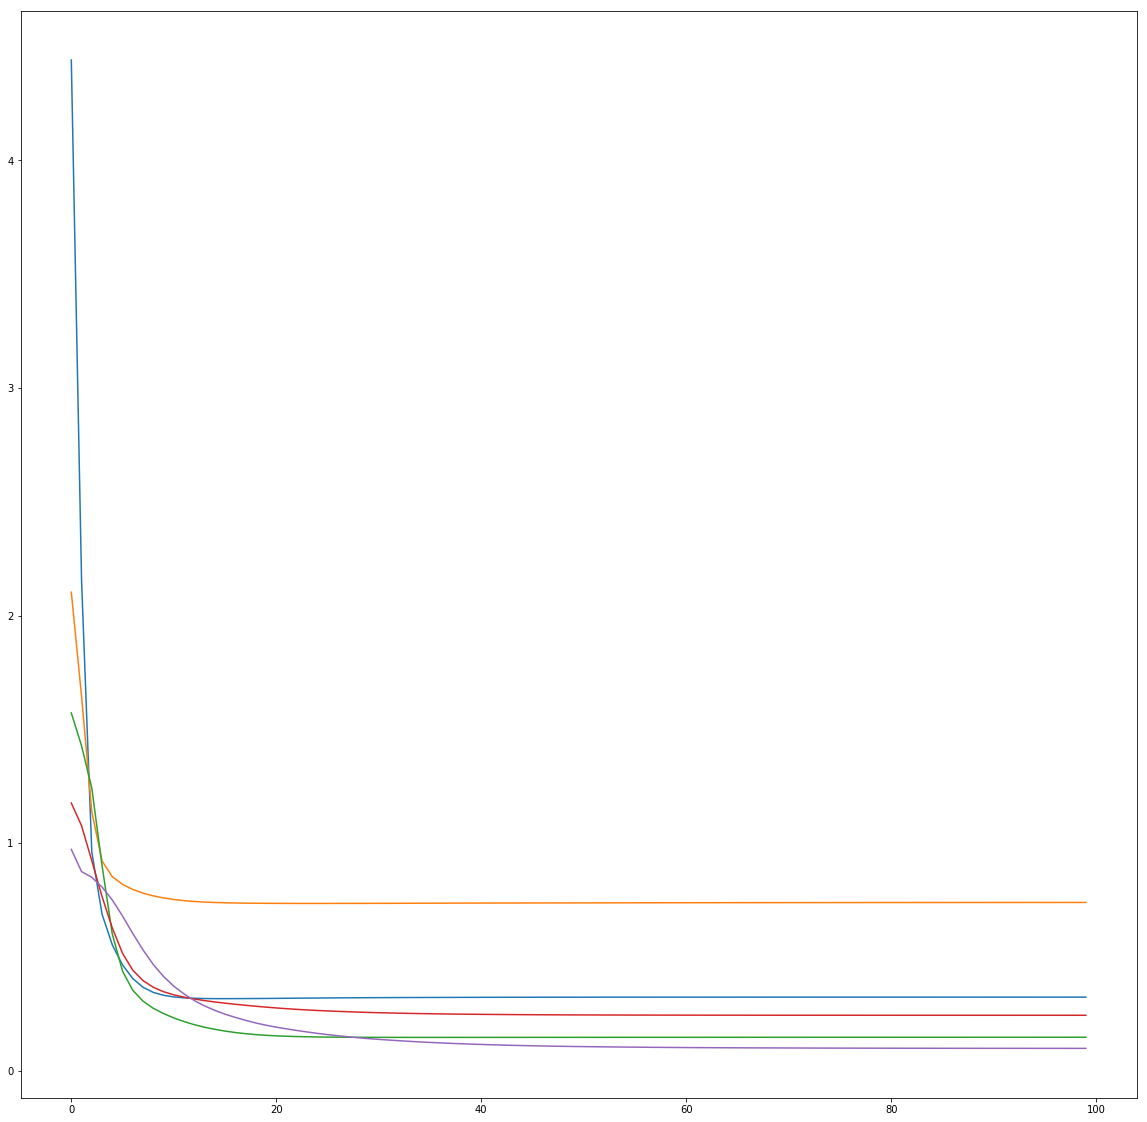

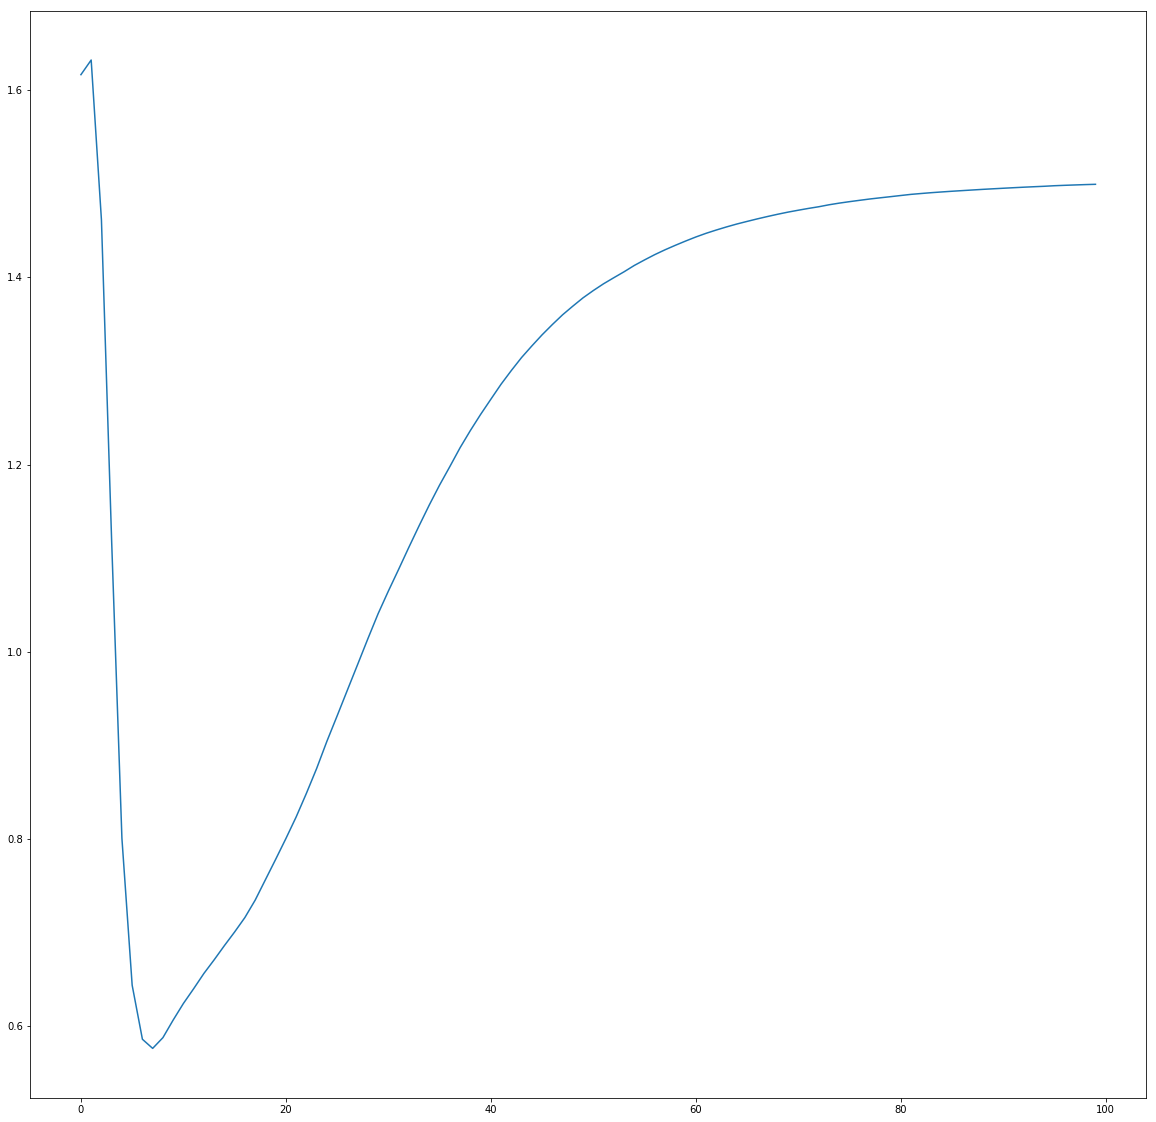

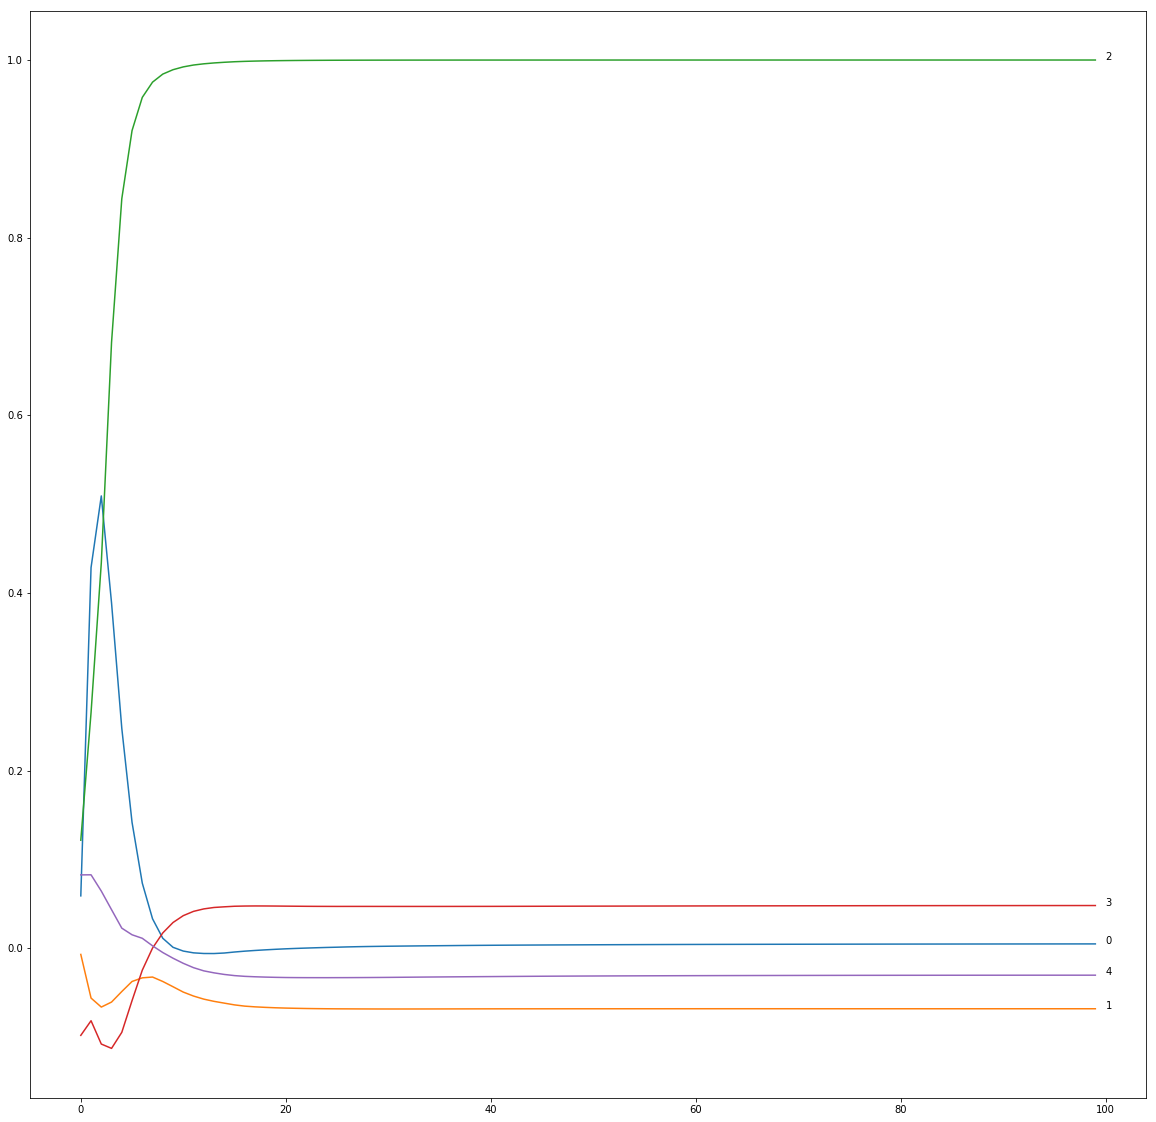

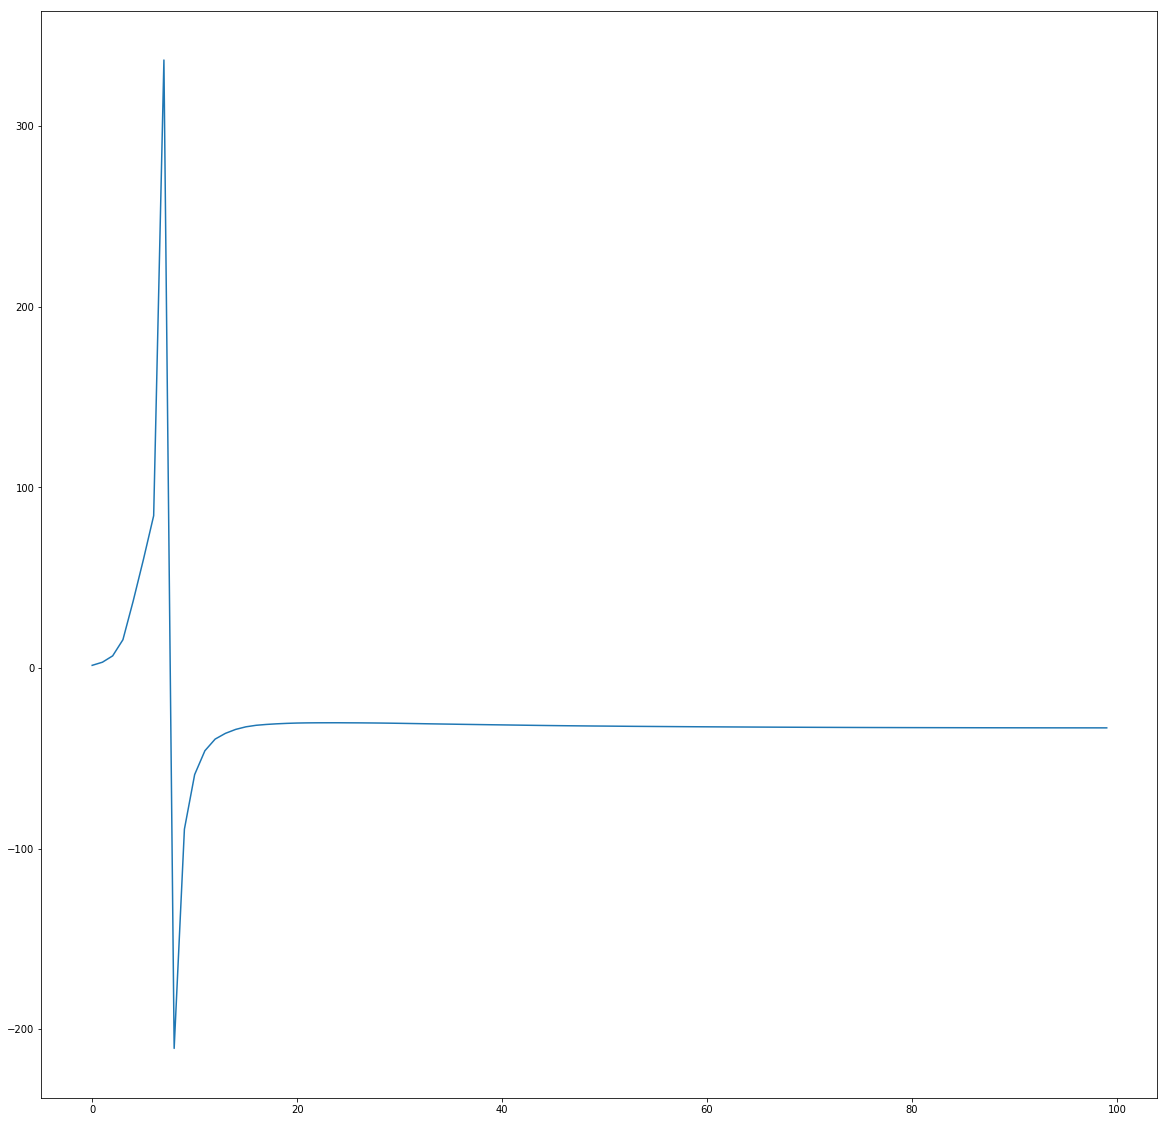

In [183]:
def get_student_trajs(d):
    num_teacher, num_student = d[1]["corr_train"].size()

    student_traj = np.zeros((num_iter - 1, num_teacher, num_student))

    for it in range(1, num_iter):
        corr_train = d[it]["corr_train"]
        student_traj[it - 1, :, :] = corr_train.numpy()
        
    return student_traj


def get_teacher_deficiency(d):
    num_teacher, num_student = d[1]["corr_train"].size()
    teacher_deficiency = np.zeros((num_iter - 1, num_teacher))
    
    W2_t = d[0]["W2_t"][:-1,:]
    energy_t = W2_t.pow(2).sum(dim=1)
    
    for it in range(1, num_iter):
        W2_s = d[it]["W2_s"][:-1,:]
        corr_train = d[it]["corr_train"]
        
        teacher_deficiency[it - 1, :] = (W2_t - corr_train @ W2_s).norm(dim=1)
        # energy = W2_s.pow(2).sum(dim=1)
        # teacher_deficiency[it - 1, :] = (energy_t - corr_train @ energy).numpy()
        
    return teacher_deficiency

seed = list(data[0].keys())[0]
d = data[0][seed]

num_teacher, num_student = d[1]["corr_train"].size()
student_trajs = get_student_trajs(d)
teacher_deficiency = get_teacher_deficiency(d)

plt.figure(figsize=(20, 20))
plt.plot(teacher_deficiency)
plt.show()

max_corr, max_indices = d[-1]["corr_train"].max(dim=1)

teacher_j = 2
student_idx = max_indices[teacher_j]
teacher_k = 4

plt.figure(figsize=(20, 20))
plt.plot(teacher_deficiency[:, teacher_j] / teacher_deficiency[:, teacher_k])
plt.show()

plt.figure(figsize=(20, 20))
for i in range(num_teacher):
    plt.plot(student_trajs[:, i, student_idx], linestyle='-')
    plt.text(num_iter - 1, student_trajs[-1, i, student_idx], f'{i}')
    
    # plt.plot(student_trajs[:, teacher_k, i], linestyle='--')
    # plt.text(num_iter - 1, student_traj_k[-1, i], f'{i}')

plt.show()

plt.figure(figsize=(20, 20))
plt.plot(student_trajs[:, teacher_j, student_idx] / student_trajs[:, teacher_k, student_idx])

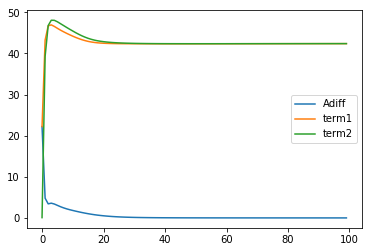

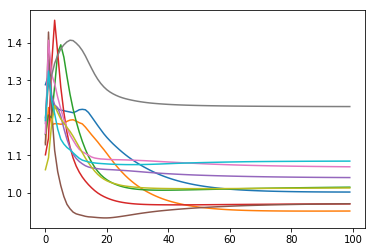

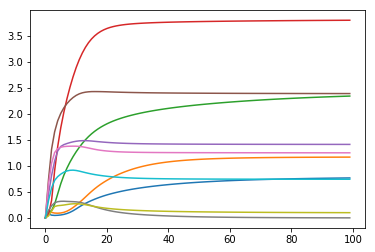

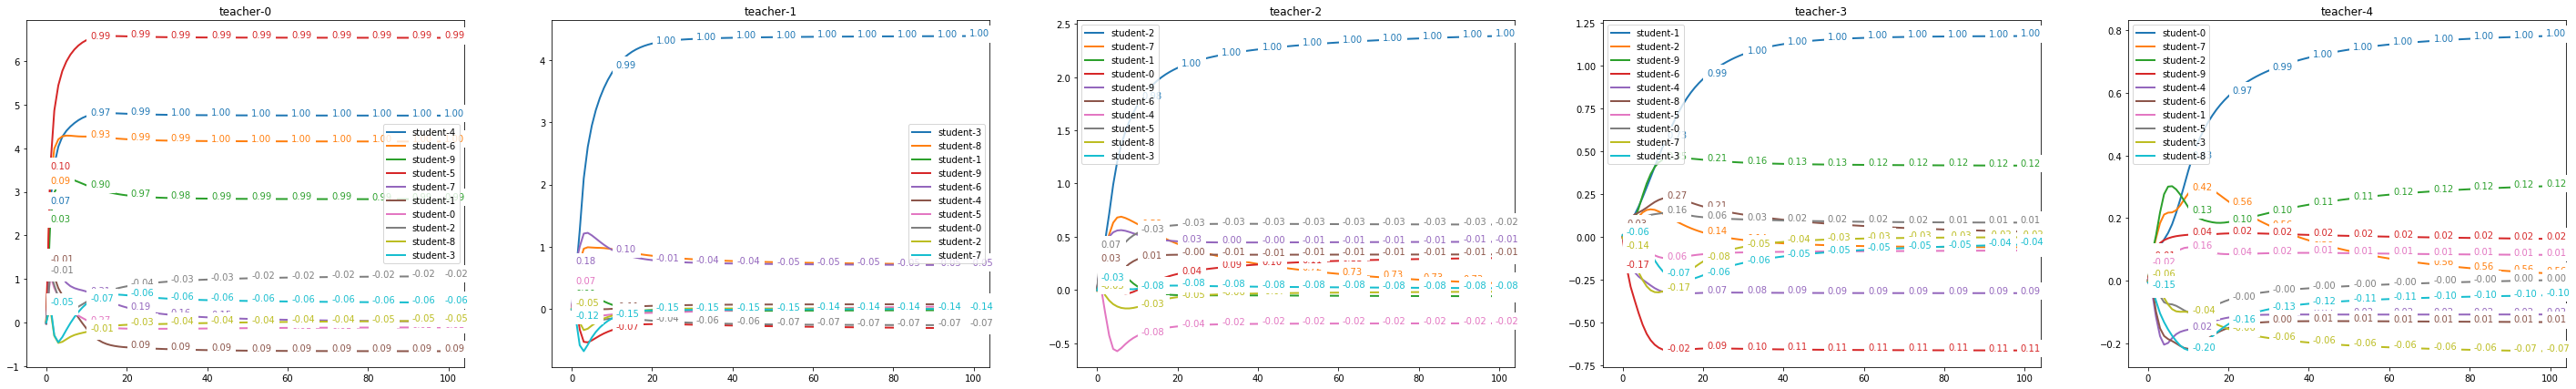

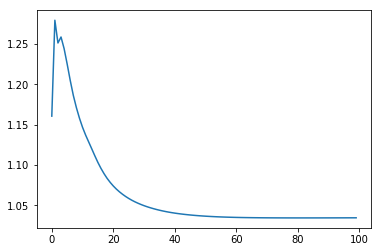

In [257]:
seed = list(data[0].keys())[0]
d = data[0][seed]

W2_t = d[0]["W2_t"][:-1,:]
vs = W2_t.pow(2).sum(dim=1)
Ms = W2_t @ W2_t.t()

# num_iter = min(len(d), 30)
num_iter = len(d)
num_teacher, num_student = d[1]["corr_train"].size()

Adiff_norm = np.zeros((num_iter - 1))
term1_norm = np.zeros((num_iter - 1))
term2_norm = np.zeros((num_iter - 1))

for it in range(1, num_iter):
    dd = d[it]
    
    A = W2_t @ dd["W2_s"][:-1,:].t()
    term1 = Ms @ dd["ts_prod"]
    term2 = A @ dd["ss_prod"]
    Adiff = term1 - term2
    
    Adiff_norm[it - 1] = Adiff.norm()
    term1_norm[it - 1] = term1.norm()
    term2_norm[it - 1] = term2.norm()
    
    
plt.plot(Adiff_norm, label="Adiff")
plt.plot(term1_norm, label="term1")
plt.plot(term2_norm, label="term2")
plt.legend()
plt.show()

student_norms = torch.DoubleTensor(num_iter - 1, num_student)
student_top_norms = torch.DoubleTensor(num_iter - 1, num_student)
student_A = torch.DoubleTensor(num_iter - 1, num_student, num_teacher)

for it in range(1, num_iter):
    dd = d[it]
    student_norms[it - 1, :] = dd["ss_prod"].diag()
    student_top_norms[it - 1, :] = dd["W2_s"][:-1,:].pow(2).sum(dim=1)
    student_A[it - 1, :, :] = dd["W2_s"][:-1,:] @ W2_t.t()

plt.plot(student_norms.numpy())
plt.show()

corrs = d[-1]["corr_train"]
sorted_corrs, sorted_student_indices = corrs.sort(dim=1, descending=True)

plt.plot(student_top_norms.numpy())
plt.show()

plt.figure(figsize=(50, 7))
for i in range(num_teacher):
    plt.subplot(1, num_teacher, i + 1)
    for idx in sorted_student_indices[i, :]:
        # if corrs[i, idx] < 0.2: 
        #    break
        # coeff = student_top_norms[:, idx]
        coeff = student_A[:, idx, i]
            
        # p = plt.plot(student_top_norms[:, idx].numpy(), linewidth=2, label=f"student-{idx}")
        p = plt.plot(coeff.numpy(), linewidth=2, label=f"student-{idx}")
        for it in (list(range(1, num_iter, 10)) + [num_iter - 2]):
            c = d[it]["corr_train"][i, idx]
            plt.text(it, coeff[it], f"{c:#.2f}", color=p[0].get_color(), backgroundcolor="white")
    plt.title(f"teacher-{i}")
    plt.legend()
# plt.show()
plt.savefig("over-parameterization-adv-init.pdf")
plt.show()

plt.plot(student_norms.mean(dim=1).numpy())
plt.show()

In [123]:
Adiff_norm

array([56.9205503 ,  4.75563913,  4.20424167,  3.96963105,  3.75782406,
        3.57708366,  3.41715772,  3.27059086,  3.13038557,  2.99620218,
        2.87245685,  2.75672141,  2.64942357,  2.54716001,  2.45040631,
        2.35833212,  2.27049091,  2.18758557,  2.10729034,  2.0313255 ,
        1.95921907,  1.89072629,  1.82587518,  1.76373932,  1.70467939,
        1.64794089,  1.59353748,  1.54145217,  1.49132529,  1.44302343,
        1.39647792,  1.3517573 ,  1.30863601,  1.26710957,  1.22732026,
        1.18887797,  1.15154142,  1.11562137,  1.08080671,  1.04721838,
        1.01468526,  0.98312545,  0.95258456,  0.9230974 ,  0.89458206,
        0.86691398,  0.84009178,  0.81421695,  0.78925283,  0.76507073,
        0.74171203,  0.71904075,  0.69695461,  0.67548574,  0.65472197,
        0.63462122,  0.61521941,  0.59647612,  0.5782291 ,  0.56046337,
        0.54329067,  0.52668871,  0.51075664,  0.49541123,  0.48065062,
        0.46646083,  0.45271648,  0.43948162,  0.42672773,  0.41

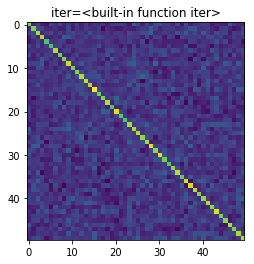

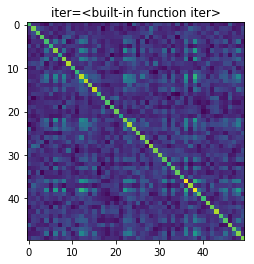

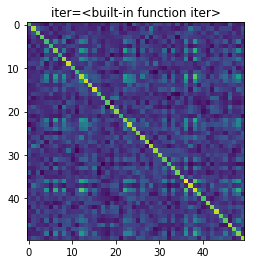

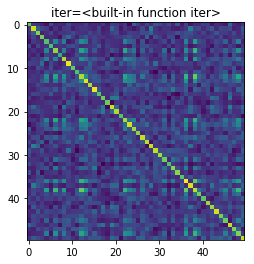

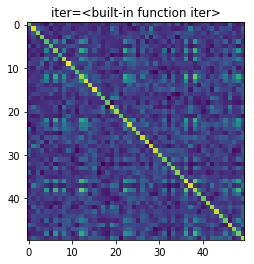

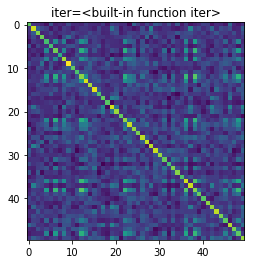

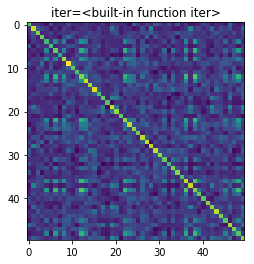

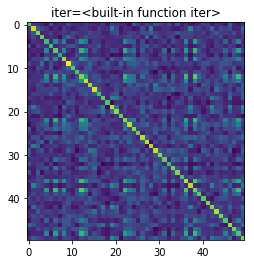

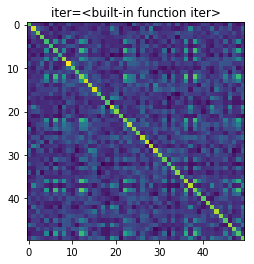

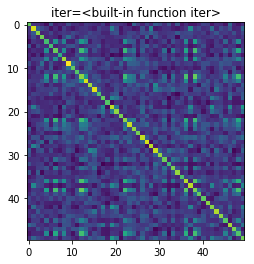

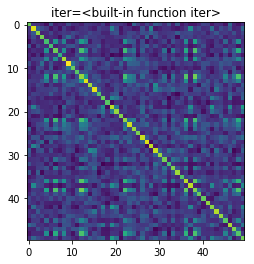

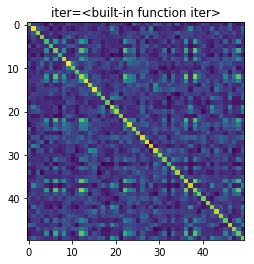

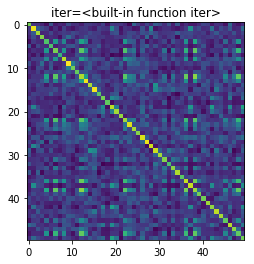

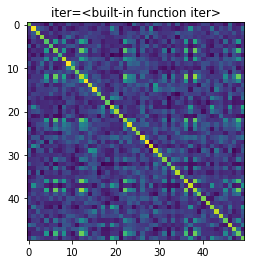

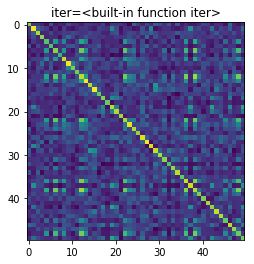

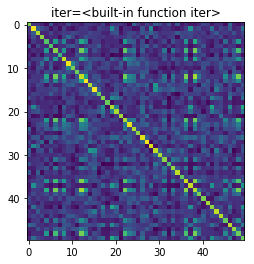

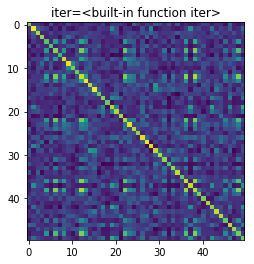

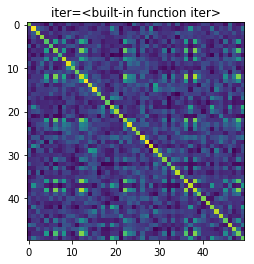

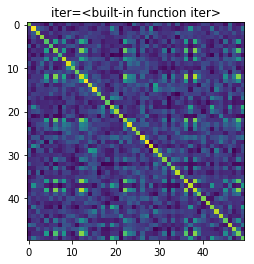

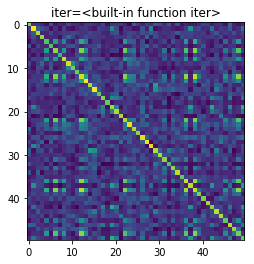

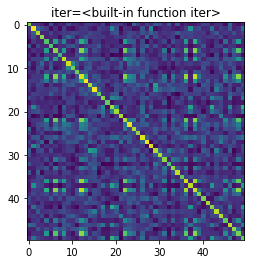

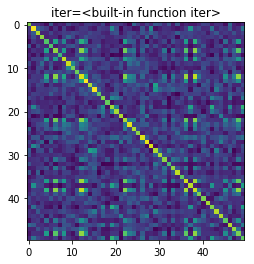

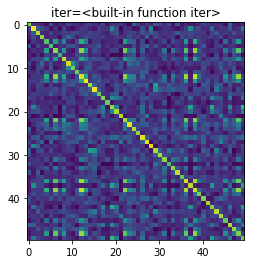

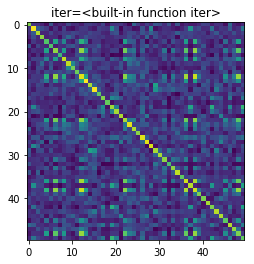

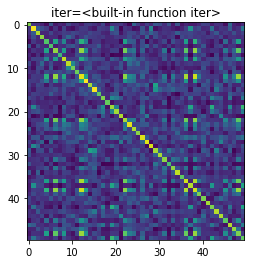

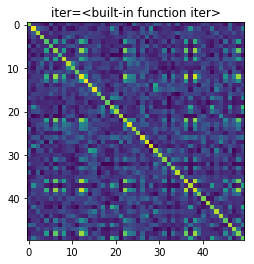

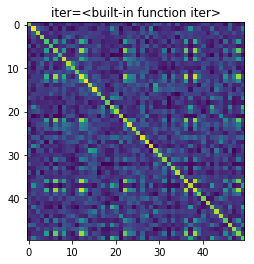

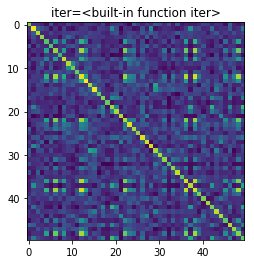

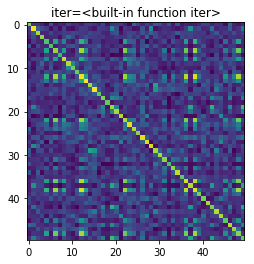

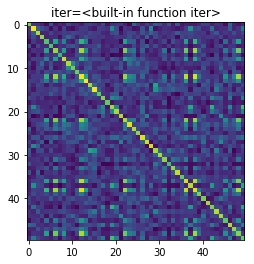

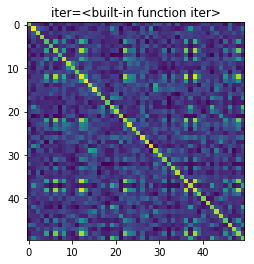

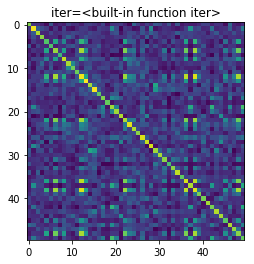

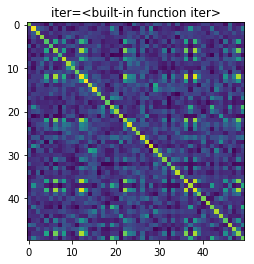

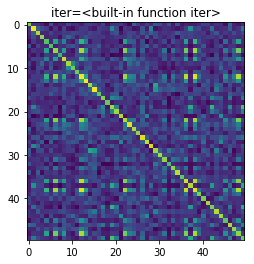

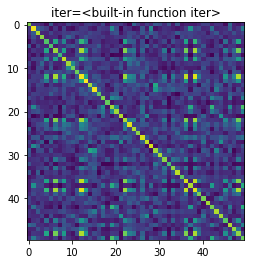

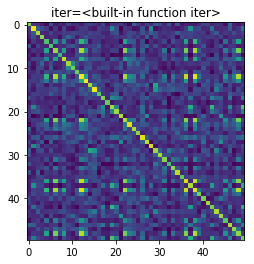

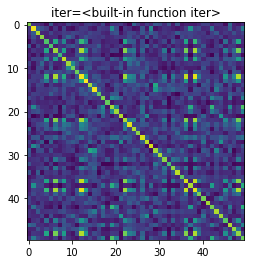

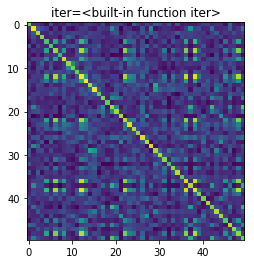

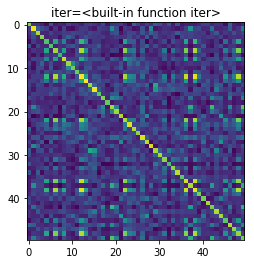

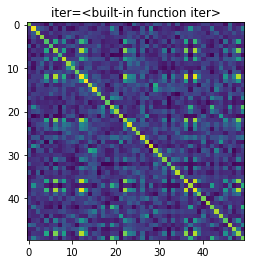

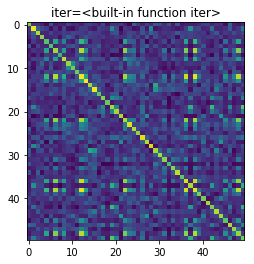

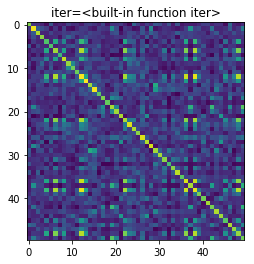

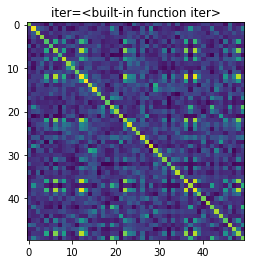

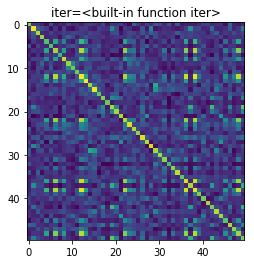

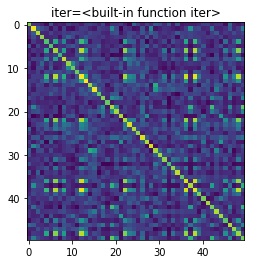

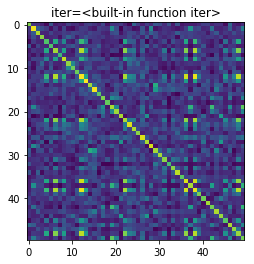

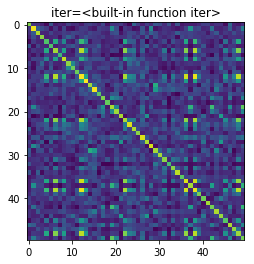

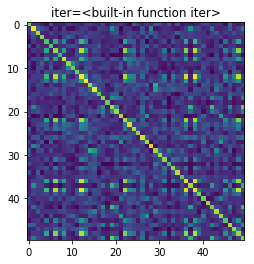

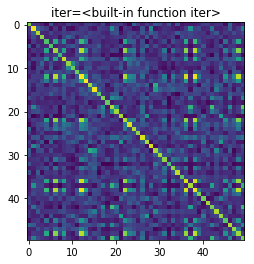

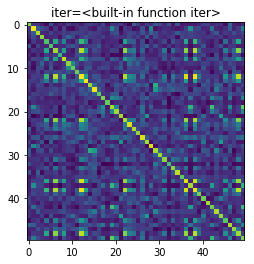

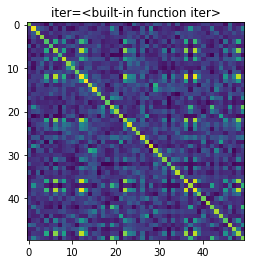

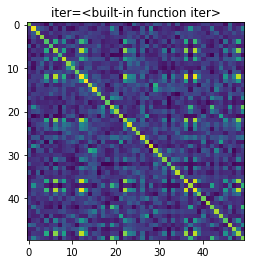

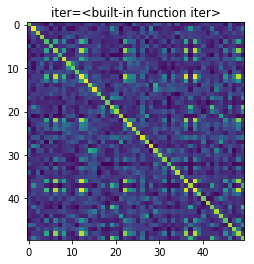

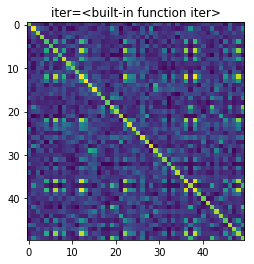

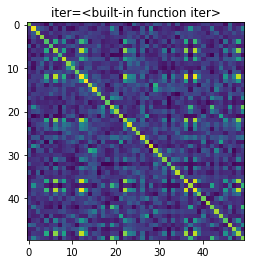

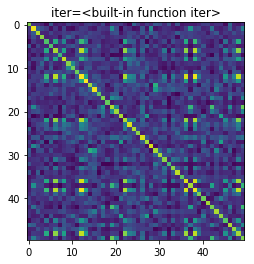

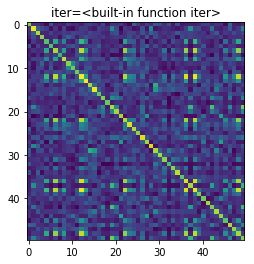

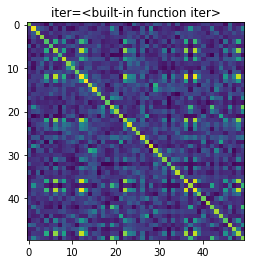

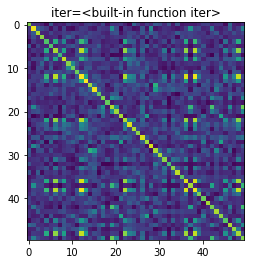

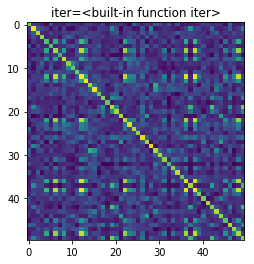

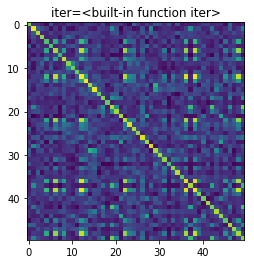

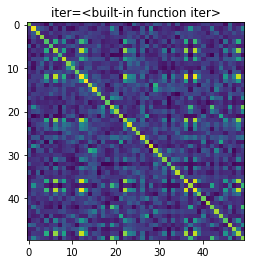

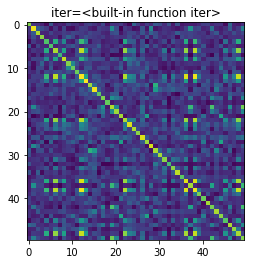

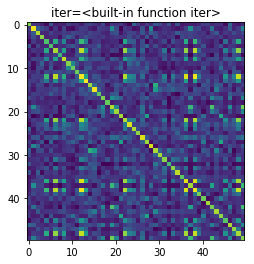

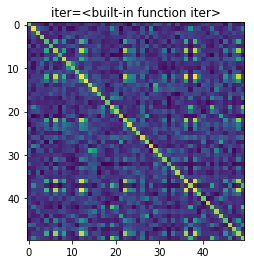

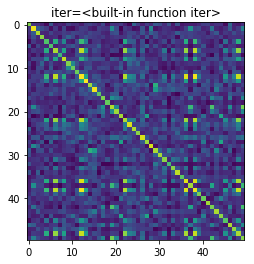

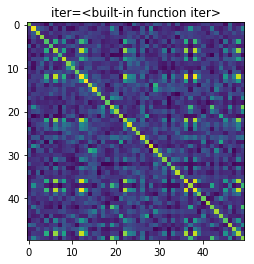

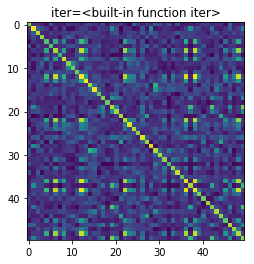

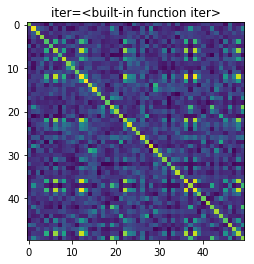

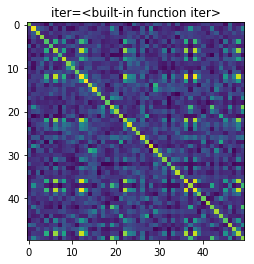

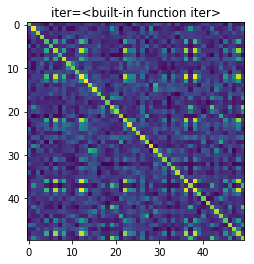

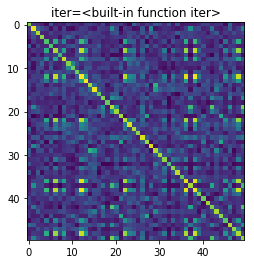

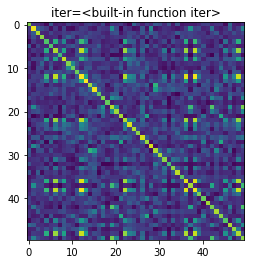

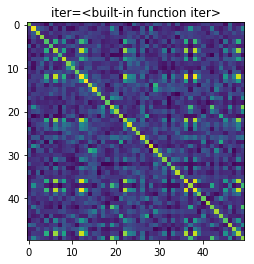

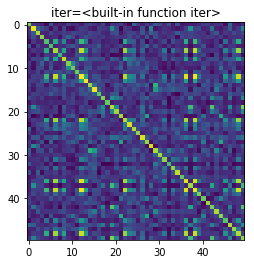

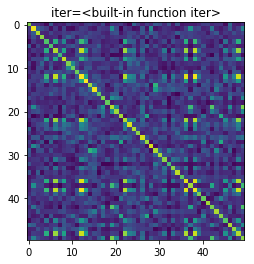

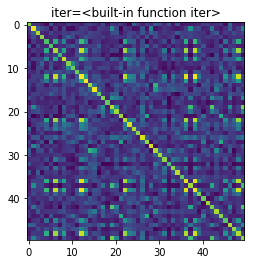

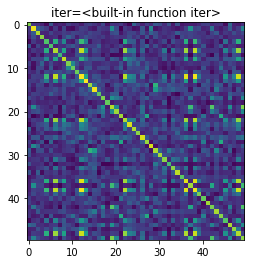

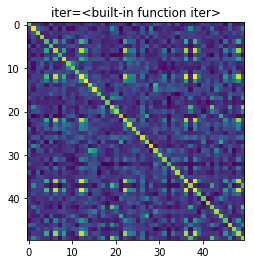

In [134]:
for it in range(1, 80):
    dd = d[it]
    plt.imshow(dd["ss_prod"])
    plt.title(f'iter={it}')
    plt.show()

In [140]:
d[-1].keys()

dict_keys(['iter', 'W1_s', 'W2_s', 'loss', 'corr_train', 'corr_eval', 'counts', 'ts_prod', 'ss_prod'])